# Sales

The purpose of this project is to analyze and visualize the sales of a company. <br>
The data consist of a sample monthly sales data for 1 year in distinct (.csv) file. <br>
This project is inspired by Keith Galii video (<a href="https://www.youtube.com/watch?v=eMOA1pPVUc4&t=3128s">Link</a>) </p>

## Question

- What was the best month for sales? How much was earned on that month?
- What city have a highest number of sales?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What product sold the most? Why do you think it sold the most?
- What products are most often sold together?

### T1: Import Library

In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [53]:
tes = np.arange(2011,2021,1).tolist()
#tes = tes.tolist()
tes1 = [2010,2011,2012,2013]
print(tes)
print(type(tes1))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
<class 'list'>


### T2: Read sales data and merge into 1 file

Read sales data from different .csv file and concatenate into 1 file

In [54]:
#files is a list of file (monthly sales data) data frame
files = [file for file in os.listdir("./datasets")]

#creating new data frame for file storing places
all_data = pd.DataFrame() 

#pd.concat() to store it to all_data
for file in files:
    monthly_sales = pd.read_csv("./datasets/" + file)
    all_data = pd.concat([all_data, monthly_sales])

all_data.to_csv("./datasets/all_data.csv", index = False)


Read the concatenated sales file

In [55]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### T3: Cleaning the Data

#### a. Clean NAN Data

Clean the NAN data

In [56]:
nan_data = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how = 'any')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### b. Clean 'Or' data in Month

There are another 'defect' rows in all_data.

In [57]:
temp_tes = all_data[all_data['Order Date'].str[0:2] == 'Or']      #the 'Or' located on row number 517 
temp_tes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Clean the 'defect' data.

In [58]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### c. Change Data type to numeric

Change Quantity Ordered column and Price Each column to numeric data

In [59]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Q1: What was the best month for sales? How much was earned on that month?  

#### T1: Adding month column data 

In [60]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = pd.to_numeric(all_data['Month'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### T2: Adding sales column data

In [61]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### T3: Groupping sales by month

In [62]:
monthly_sales = all_data.groupby('Month').sum()
print(monthly_sales)

       Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


#### T4: Visualizing sales per month

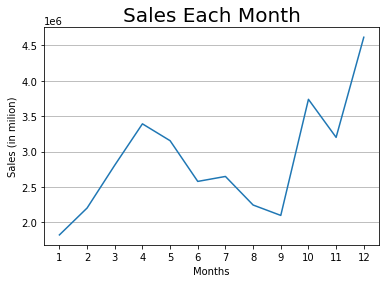

In [63]:
month = range(1,13)
plt.plot(month, monthly_sales['Sales'])
plt.title('Sales Each Month', size = 20)
plt.xlabel('Months')
plt.xticks(month)
plt.ylabel('Sales (in milion)')
plt.grid(axis = 'y' )
plt.show()

The sales are surging in December. <br> 
It happened because people tend to spend their money at the end of the year, maybe to self-reward themselves after a busy year, buying a gift for their lovely one, and many more.

### Q2: What city have a highest number of sales?

T1: Adding City column

In [64]:
def get_city(address):
    return f"{address.split(',')[1]} ({address.split(',')[2].split(' ')[1]})"

all_data['City'] = all_data['Purchase Address'].apply([lambda x: get_city(x)])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### T2: Groupping sales by city

In [65]:
cities_sales = all_data.groupby('City').sum()
all_data.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


#### T3: Visualizing sales per city

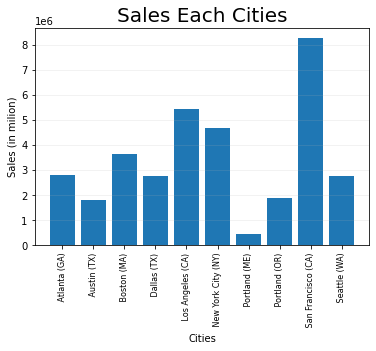

In [66]:
City = [cities for cities, df in all_data.groupby('City')]
plt.bar(City, cities_sales['Sales'])
plt.title('Sales Each Cities', size = 20)
plt.xlabel('Cities')
plt.xticks(City, rotation = 'vertical', size=8)
plt.ylabel('Sales (in milion)')
plt.grid(axis = 'y', alpha=0.2)
plt.show()

The city that has the most sales is San Francisco. <br>
There are other cities with smaller numbers of sales and it could be a sign for a better market penetration and strategy to increase the sales in those cities.

### Q3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

#### T1: Adding hour column

In [69]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


#### T2: Visualizing sales per hour

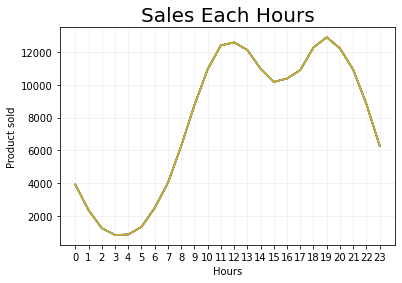

In [70]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count())
plt.title('Sales Each Hours', size = 20)
plt.xlabel('Hours')
plt.xticks(hours)
plt.ylabel('Product sold')
plt.grid(axis = 'both', alpha=0.2)
plt.show()

From the graph above, we can conclude that the most sales are made from 11AM-13PM and 18PM-20PM. <br>
The first was a free time for many workers (lunch time) and the latter is the time that most workers rest after arriving at their home. Also, it could be a sign that, those time are the time the customer spend their time browsing the website the most.  <br>
Those times are the best times for advertising our product. 

### Q4: What product sold the most? Why do you think it sold the most?

#### T1: Group the data

In [71]:
product_sold = all_data.groupby('Product').sum()
product_sold

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


#### T2: Visualizing product sold

<ipython-input-84-890b44ba7040>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = '90', size=8)


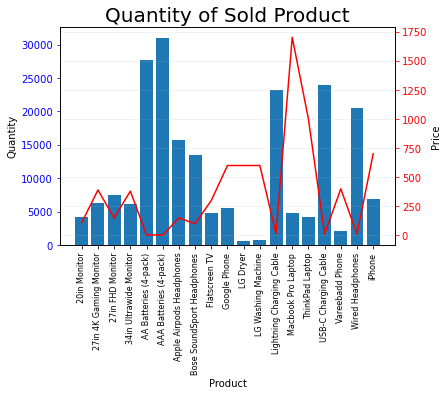

In [84]:
prices = all_data.groupby('Product').mean()['Price Each']
products = [product for product, df in all_data.groupby('Product')]

fig, ax1 = plt.subplots()

ax1.bar(products,product_sold['Quantity Ordered'])
ax2 = ax1.twinx()
ax2.plot(products, prices, 'red')

plt.title('Quantity of Sold Product', size = 20)
ax1.set_xlabel('Product')
ax1.set_xticklabels(products, rotation = '90', size=8)
ax1.tick_params('y', colors= 'b')
ax1.set_ylabel('Quantity')
ax2.tick_params('y', colors= 'r')
ax2.set_ylabel('Price')

plt.grid(axis = 'y', alpha=0.2)
plt.show()

The 5 products that sold the most is AA Batteries (USD 3.84), AAA Batteries (USD 2.99), Lightning Charging Cable (USD 14.95), USB-C Charging Cable (USD 11.95), and Wired Headphone (11.99). <br>
The reason why there are so many of these products that have been sold is because the prices of these products are the cheapest amongst the others.


In [75]:
print(prices.sort_values())

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64


### Q5: What products are most often sold together?

#### T1: Finding which items that ordered together

In [85]:
duplicate = all_data[all_data['Order ID'].duplicated(keep = False)]
duplicate['Groupped'] = duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-85-bc3e0497e1fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate['Groupped'] = duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


#### T2: Create a list of item which ordered together

In [48]:
duplicate = duplicate[['Order ID', 'Groupped']].drop_duplicates()
duplicate.head()

,Order ID,Groupped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### T3: Iterate over the 'Groupped' column to find the item which sold together

In [49]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicate['Groupped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key,value)


('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143


The item that is mostly sold together is an Iphone + Lightning Charging Cable (1005 pcs). <br>
The top 9 pairs are contained by phone + charging cable/headphone which is relevant because many phone products nowadays don't include charging cable in their product box.